# CA03 – Decision Tree Algorithm 


## Import Libraries and required packages

In [0]:
import pandas as pd
import numpy as np

from sklearn import tree
import graphviz
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


In [2]:
!pip install ipython-autotime # this displays runtime for every cell

%load_ext autotime

## Reading the Dataset



In [3]:
#read datasets
data = pd.read_csv("https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true",low_memory=False)
#look at the first 5 records
data.head()


,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


time: 1.54 s


## Split the columns 

We will split the columns to change it from "a. High" to just "High" format. This is a part pf data preparation and preprocessing

In [4]:
# splits hours per week 
hpw_new=data["hours_per_week_bin"].str.split(". ", n = 1, expand = True)
data['hours_per_week']=hpw_new[1]

#splitting Occupation
occ_new=data["occupation_bin"].str.split(". ",n=1, expand =True)
data["occupation"]=occ_new[1]

#marital status
msr_new=data["msr_bin"].str.split(". ",n=1, expand=True)
data["msr"]=msr_new[1]

#capitalgain/loss
cgb_new=data["capital_gl_bin"].str.split(". ",n=1, expand=True)
data["capital_gl"]=cgb_new[1]

#Race and sex

rs_new=data["race_sex_bin"].str.split(". ",n=1, expand=True)
data["race_sex"]=rs_new[1]

#education bin
edu_new=data["education_bin"].str.split(". ",n=1, expand=True)
data["education"]=edu_new[1]


#Age
age_new=data["age_bin"].str.split(". ",n=1, expand=True)
data["age"]=age_new[1]
data.head()

#Education num 
edu_num_new=data["education_num_bin"].str.split(". ",n=1, expand=True)
data["education_num"]=age_new[1]
data.head()

#Workclass_bin
wc_new=data["workclass_bin"].str.split(". ",n=1, expand=True)
data["workclass"]=wc_new[1]
data.head()
# Below is the dataframe with splitted columns added as new columns and in next step we will delete the original columns

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y,hours_per_week,occupation,msr,capital_gl,race_sex,education,age,education_num,workclass
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0,31-40,Mid - Low,Mid,> 0,High,Bachelors,36-40 & 56-60,36-40 & 56-60,income
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0,0-30,High,High,= 0,High,Bachelors,40-55,40-55,income
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0,31-40,Low,Mid,= 0,High,Mid,36-40 & 56-60,36-40 & 56-60,income
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0,31-40,Low,High,= 0,Mid,Low,40-55,40-55,income
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0,31-40,High,High,= 0,Low,Bachelors,26-30 & 71-100,26-30 & 71-100,income


time: 1.46 s


##Remove the unnecessary Columns from dataframe

In [5]:
data = data.drop(['hours_per_week_bin','occupation_bin','msr_bin','capital_gl_bin','education_bin','age_bin','race_sex_bin','workclass_bin','education_num_bin'], axis=1)
data.head()

,flag,y,hours_per_week,occupation,msr,capital_gl,race_sex,education,age,education_num,workclass
0,train,0,31-40,Mid - Low,Mid,> 0,High,Bachelors,36-40 & 56-60,36-40 & 56-60,income
1,train,0,0-30,High,High,= 0,High,Bachelors,40-55,40-55,income
2,train,0,31-40,Low,Mid,= 0,High,Mid,36-40 & 56-60,36-40 & 56-60,income
3,train,0,31-40,Low,High,= 0,Mid,Low,40-55,40-55,income
4,train,0,31-40,High,High,= 0,Low,Bachelors,26-30 & 71-100,26-30 & 71-100,income


time: 85.1 ms


##Exploratory Data Analysis - Bar Charts

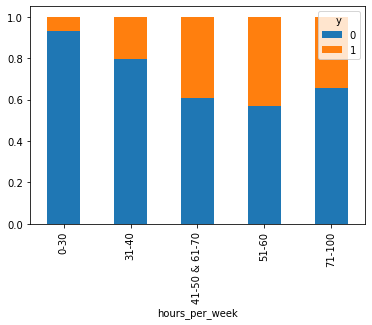

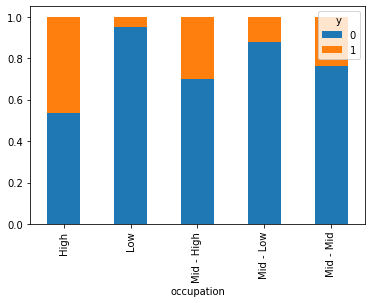

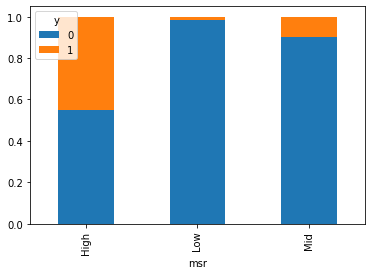

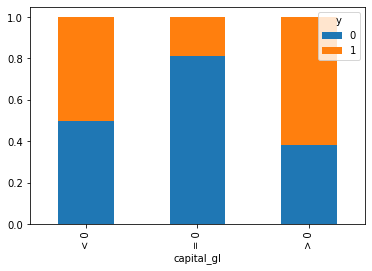

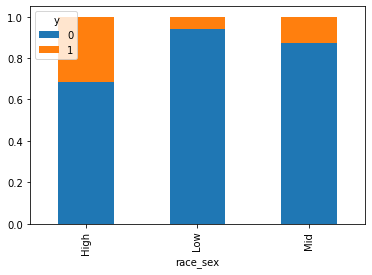

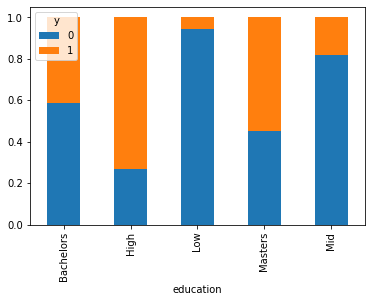

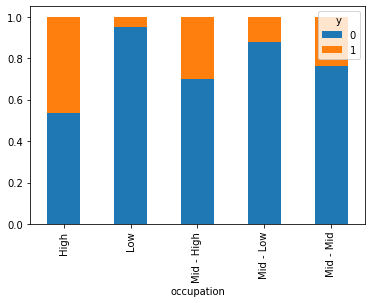

time: 1.67 s


In [6]:
#Creating Stacked Bar charts to display the categoris in each columns 

pd.crosstab(data['hours_per_week'], data['y'],normalize='index').plot(kind='bar', stacked=True)
pd.crosstab(data['occupation'], data['y'],normalize='index').plot(kind='bar', stacked=True)
pd.crosstab(data['msr'], data['y'],normalize='index').plot(kind='bar', stacked=True)
pd.crosstab(data['capital_gl'], data['y'],normalize='index').plot(kind='bar', stacked=True)
pd.crosstab(data['race_sex'], data['y'],normalize='index').plot(kind='bar', stacked=True)
pd.crosstab(data['education'], data['y'],normalize='index').plot(kind='bar', stacked=True)
pd.crosstab(data['occupation'], data['y'],normalize='index').plot(kind='bar', stacked=True)

## Display Data Descriptives

In [7]:
data.info() # Descriptives for all the numerical columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
flag              48842 non-null object
y                 48842 non-null int64
hours_per_week    48842 non-null object
occupation        48842 non-null object
msr               48842 non-null object
capital_gl        48842 non-null object
race_sex          48842 non-null object
education         48842 non-null object
age               48842 non-null object
education_num     48842 non-null object
workclass         48842 non-null object
dtypes: int64(1), object(10)
memory usage: 4.1+ MB
time: 48.1 ms


In [8]:
# Use inclus='O' to show data descriptive for categorical columns
data.describe(include ='O') #data descriptives

,flag,hours_per_week,occupation,msr,capital_gl,race_sex,education,age,education_num,workclass
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,2,5,5,3,3,3,5,5,5,2
top,train,31-40,Mid - Mid,High,= 0,High,Mid,40-55,40-55,income
freq,32561,26639,13971,22047,42525,29737,30324,13963,13963,46012


time: 244 ms


## Create Dummy Variables

In [9]:
#Create dummy variables for the below columns to prepare the data for running the model 
data = pd.get_dummies(data, columns=['hours_per_week', 'occupation', 'msr', 'capital_gl', 'race_sex', 'education', 'age','workclass','education_num'])
data.head()

,flag,y,hours_per_week_0-30,hours_per_week_31-40,hours_per_week_41-50 & 61-70,hours_per_week_51-60,hours_per_week_71-100,occupation_High,occupation_Low,occupation_Mid - High,occupation_Mid - Low,occupation_Mid - Mid,msr_High,msr_Low,msr_Mid,capital_gl_< 0,capital_gl_= 0,capital_gl_> 0,race_sex_High,race_sex_Low,race_sex_Mid,education_Bachelors,education_High,education_Low,education_Masters,education_Mid,age_0-25,age_26-30 & 71-100,age_31-35 & 61-70,age_36-40 & 56-60,age_40-55,workclass_income,workclass_no income,education_num_0-25,education_num_26-30 & 71-100,education_num_31-35 & 61-70,education_num_36-40 & 56-60,education_num_40-55
0,train,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,train,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
2,train,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
3,train,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1
4,train,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0


time: 174 ms


## Split the Data into Training and Testing sets

In [10]:
#Split data into training and test datasets
#Training
data_train=data.loc[data['flag']=='train'] #select rows with flag as train
x_train=data_train.drop(['y','flag'], axis=1)
x_train.head()
y_train = data_train['y']

#Testing data
data_test=data.loc[data['flag']=='test'] #select rows with flag as train
x_test=data_test.drop(['y','flag'], axis=1)
y_test = data_test['y']

data_att = data.drop(['y','flag'], axis=1) # all the columns except outcome column 
data_income = data['y'] #crete a variable with income column of entire data set
# number of income > 50K in whole dataset:
print("Income >50K: %d out of %d (%.2f%%)" % (np.sum(data_income), len(data_income), 100*float(np.sum(data_income)) / len(data_income)))


Income >50K: 11687 out of 48842 (23.93%)
time: 160 ms


# Fit Decision Tree

In [11]:
# Fit a decision tree
from sklearn.tree import DecisionTreeClassifier
t = DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=101,max_features=None)
t = t.fit(x_train, y_train)
y_pred=t.predict(x_test)

time: 69 ms


Visualize the Decision Tree

In [12]:
#import necessary libraries
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

import graphviz


time: 16.2 ms


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


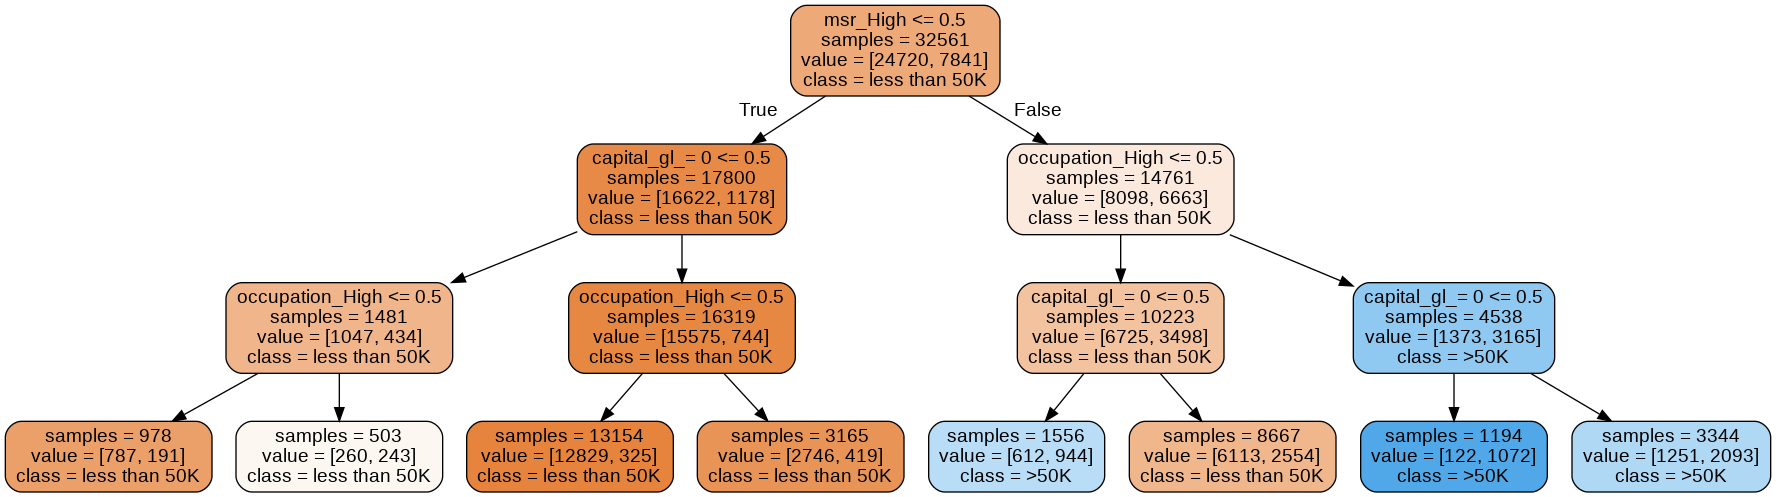

time: 257 ms


In [13]:
#Visualize the decision tree

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data, label='all', impurity=False, proportion=False, 
                               feature_names=list(x_train), class_names=['less than 50K', '>50K'],
                               filled=True, rounded=True) # Graphviz to show the tree 
graph = graphviz.Source(dot_data)
graph

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) # stores the graph as png

Decision Tree Evaluation and Performance Testing

In [14]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support

acc=accuracy_score(y_test,y_pred) # accuracy score


# Printing classifier report after prediction
print(classification_report(y_test,y_pred))
arr=precision_recall_fscore_support(y_test,y_pred) # this function stores it as an array which wil be used later while automating 




              precision    recall  f1-score   support

           0       0.86      0.92      0.89     12435
           1       0.68      0.52      0.59      3846

    accuracy                           0.83     16281
   macro avg       0.77      0.72      0.74     16281
weighted avg       0.82      0.83      0.82     16281

time: 96 ms


In [15]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[11476   959]
 [ 1850  1996]]
0.8274676002702537
time: 34.1 ms


0.7209298649388678


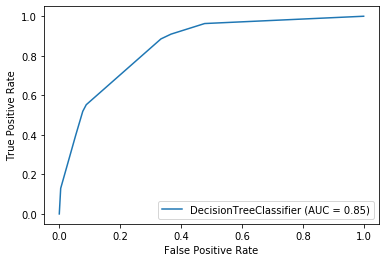

time: 319 ms


In [16]:
#print roc score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
test_auc = roc_auc_score(y_test, y_pred)
#ROC AUC Curve
plot_roc_curve(t, x_test, y_test)

print(test_auc)

# 7. Hyper Parameter Tuning

For This part we will manually tune the  four hyper parameters 

1. Criteria
2. Max_depth
3. min sample split
4. min sample leaf

We will create a list of desired values and iterate over these values and print the accuracy and classification report with each of these parameters and decide the best model based on the performance scores

In [17]:
#tuning hyper parameters manually 
from sklearn.tree import DecisionTreeClassifier
criteria=['entropy','gini'] #create a matirx with required criteria to alter while hyperparameter tuning
max_depth=[10,15,6,7] # similar matrix for max_depth
min_samples_leaf=[5,10,15,20] 
min_samples_split=[7,10,20,15]
for i in range(len(criteria)): # this loop iterates over the crietria matrix because it is of lenght 2
  for j in range(4): # this loop iterates over the other matrix of lenght 4
    t = DecisionTreeClassifier(criterion=criteria[i], max_depth=max_depth[j],min_samples_leaf=min_samples_leaf[j], min_samples_split =min_samples_split[j], random_state=101,max_features=None )
    t = t.fit(x_train, y_train) # run and fit decision tree
    y_pred=t.predict(x_test) # predict resilts
    print("Classification report when crieria =", criteria[i], "max_depth =", max_depth[j], "min_samples_leaf =", min_samples_leaf[j], "min_samples_split=  ", min_samples_split[j])
    acc=accuracy_score(y_test,y_pred) # check accuracy of the model
    print(acc)
    print(classification_report(y_test,y_pred)) # print other performance metric
    precision_recall_fscore_support(y_test,y_pred)

# below are the perfromance score for each and every matrix


Classification report when crieria = entropy max_depth = 10 min_samples_leaf = 5 min_samples_split=   7
0.8436213991769548
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.84      0.84      0.84     16281

Classification report when crieria = entropy max_depth = 15 min_samples_leaf = 10 min_samples_split=   10
0.8408574411891161
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.70      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.76     16281
weighted avg       0.83      0.84      0.83     16281

Classification report when crieria = entropy max_depth = 6 min_samples_leaf = 15 min_samples_split

# Automation of performance testing 

For this part we will create a CSV manually in Excel and upload it in our notebook. Then we will hard populate the performance metrics by running our code below. This is automating the above step to get the best decision tree.

The 'Tree Tuning cases file has been uploaded in this Github link'. Please download and then upload the file in your notebook- https://github.com/mohusah/BSAN6070-CA-SAH/blob/master/CA03/Tree%20Tuning%20Cases.csv

In [18]:
#Create a dataframe to store the hyperparameters tuned manually in the previous steps 
automation_df=pd.read_csv('/content/Tree Tuning Cases.csv')
automation_df.head()

,Criteria,Minimum Sample Split,Minimum Sample Leaf,Maximum Depth,Accuracy,Recall,Precision,F1 Score
0,Entropy,7,5,10,NaN,NaN,NaN,NaN
1,Entropy,10,10,15,NaN,NaN,NaN,NaN
2,Entropy,20,15,6,NaN,NaN,NaN,NaN
3,Entropy,15,20,7,NaN,NaN,NaN,NaN
4,Gini,7,5,10,NaN,NaN,NaN,NaN


time: 38.4 ms


In [19]:
# automation tuning hyper parameters
from sklearn.tree import DecisionTreeClassifier



for i in range(len(automation_df)): # iterate over each row of automation_df
  if automation_df['Criteria'][i]=='Entropy': #check if criteria is Entropy and run decision trees
    t = DecisionTreeClassifier(criterion='entropy', max_depth=automation_df['Maximum Depth'][i],min_samples_leaf=automation_df['Minimum Sample Leaf'][i], min_samples_split =automation_df['Minimum Sample Split'][i], random_state=101,max_features=None )
    t = t.fit(x_train, y_train)
    y_pred=t.predict(x_test)
    acc=accuracy_score(y_test,y_pred) # store accuracy in acc variable
    automation_df["Accuracy"]=round(acc,2) #store the accuracy into the column in dataframe
    arr=pd.DataFrame(precision_recall_fscore_support(y_test,y_pred))
    automation_df['Precision'][i]=round(arr[1][0],2)
    automation_df['Recall'][i]=round(arr[1][1],2)
    automation_df['F1 Score'][i]=round(arr[1][2],2)
  else:
    t = DecisionTreeClassifier(criterion='gini', max_depth=automation_df['Maximum Depth'][i],min_samples_leaf=automation_df['Minimum Sample Leaf'][i], min_samples_split =automation_df['Minimum Sample Split'][i], random_state=101,max_features=None )
    t = t.fit(x_train, y_train)
    y_pred=t.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    automation_df["Accuracy"][i]=round(acc,2)
    arr=pd.DataFrame(precision_recall_fscore_support(y_test,y_pred))
    automation_df['Precision'][i]=round(arr[1][0],2)
    automation_df['Recall'][i]=round(arr[1][1],2)
    automation_df['F1 Score'][i]=round(arr[1][2],2)
    
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_laun

time: 954 ms


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be s

In [20]:
automation_df.head(8) #dataframe os populated now

,Criteria,Minimum Sample Split,Minimum Sample Leaf,Maximum Depth,Accuracy,Recall,Precision,F1 Score
0,Entropy,7,5,10,0.84,0.57,0.71,0.63
1,Entropy,10,10,15,0.84,0.57,0.70,0.63
2,Entropy,20,15,6,0.84,0.59,0.68,0.63
3,Entropy,15,20,7,0.84,0.57,0.70,0.63
4,Gini,7,5,10,0.84,0.57,0.71,0.63
5,Gini,10,10,15,0.84,0.56,0.70,0.62
6,Gini,20,15,6,0.84,0.59,0.69,0.63
7,Gini,15,20,7,0.84,0.59,0.70,0.64


time: 42.3 ms


Visulaize the best tree 



In [21]:
#Visualize the best tree as determined above 


best_t = tree.DecisionTreeClassifier(criterion='gini', max_depth=7,max_features=None, min_samples_split=15, min_samples_leaf=20)
best_t = best_t.fit(x_train, y_train)
y_predict= best_t.predict(x_test)


time: 120 ms


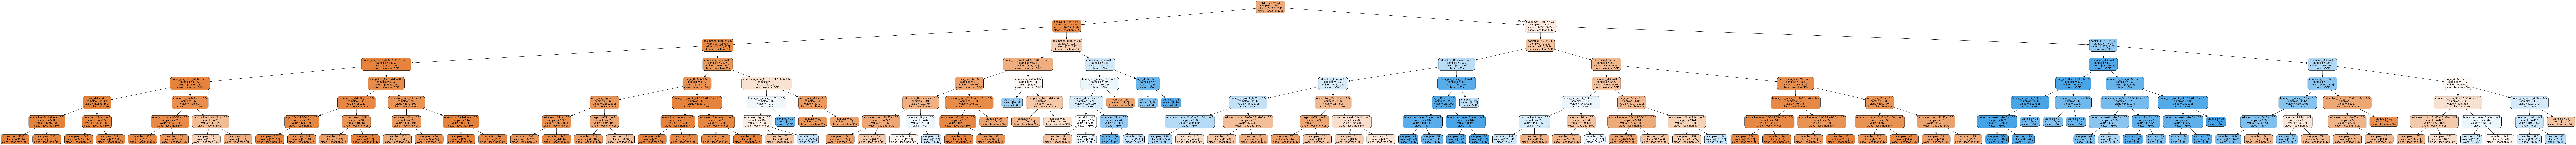

time: 3.05 s


In [22]:
dot_data = StringIO()  
export_graphviz(t, out_file=dot_data, label='all', impurity=False, proportion=False, 
                               feature_names=list(x_train), class_names=['less than 50K', '>50K'],
                               filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

##Prediction 

In this part we will create a new dataframe with just one row , which will be the one we want to check the income for using the best decision tree built in the part above

1. Create a one row data set and save it as csv
2. Run and fit the Decision tree
3. Predict the income and print the results


In [23]:
#Create a dataset
pred_sample=data.iloc[[0]].to_csv('pred.csv', sep=',', encoding='utf-8', index=False)
pred_sample=pd.read_csv('pred.csv') # read above csv file as dataframe

time: 143 ms


In [24]:
pred_sample.head() # the desired df to predict

,flag,y,hours_per_week_0-30,hours_per_week_31-40,hours_per_week_41-50 & 61-70,hours_per_week_51-60,hours_per_week_71-100,occupation_High,occupation_Low,occupation_Mid - High,occupation_Mid - Low,occupation_Mid - Mid,msr_High,msr_Low,msr_Mid,capital_gl_< 0,capital_gl_= 0,capital_gl_> 0,race_sex_High,race_sex_Low,race_sex_Mid,education_Bachelors,education_High,education_Low,education_Masters,education_Mid,age_0-25,age_26-30 & 71-100,age_31-35 & 61-70,age_36-40 & 56-60,age_40-55,workclass_income,workclass_no income,education_num_0-25,education_num_26-30 & 71-100,education_num_31-35 & 61-70,education_num_36-40 & 56-60,education_num_40-55
0,train,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


time: 119 ms


In [25]:
#edit the values as required
pred_sample[['hours_per_week_41-50 & 61-70','hours_per_week_31-40','msr_High','msr_Low','race_sex_Mid','race_sex_High','education_High','education_Bachelors'	]]=1,0,1,0,1,0,1,0
pred_sample.head()

,flag,y,hours_per_week_0-30,hours_per_week_31-40,hours_per_week_41-50 & 61-70,hours_per_week_51-60,hours_per_week_71-100,occupation_High,occupation_Low,occupation_Mid - High,occupation_Mid - Low,occupation_Mid - Mid,msr_High,msr_Low,msr_Mid,capital_gl_< 0,capital_gl_= 0,capital_gl_> 0,race_sex_High,race_sex_Low,race_sex_Mid,education_Bachelors,education_High,education_Low,education_Masters,education_Mid,age_0-25,age_26-30 & 71-100,age_31-35 & 61-70,age_36-40 & 56-60,age_40-55,workclass_income,workclass_no income,education_num_0-25,education_num_26-30 & 71-100,education_num_31-35 & 61-70,education_num_36-40 & 56-60,education_num_40-55
0,train,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


time: 276 ms


In [26]:
#Drop the outpur and flag variable to make the row ready for decision tree fitting
pred_sample = pred_sample.drop(['flag','y'], axis=1)

time: 3.01 ms


In [27]:
# Start predicting using the best modek from above


predict_value = pred_sample.iloc[0]
t = DecisionTreeClassifier(criterion='gini', max_depth=7,random_state=101,max_features=None, min_samples_split=15, min_samples_leaf=20)
t = t.fit(x_train, y_train)
y_predict= t.predict([predict_value.tolist()])




time: 184 ms


In [28]:
#Display the results 
if(y_predict[0]==0):
  print("income predicted for this person below 50k")
else:
  print("income predicted for this person is  above 50 K")
# accuracy for this model is 0.84
# Our decision tree predicts the income of this person with 84% accuracy

income predicted for this person is  above 50 K
time: 4.84 ms
